In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets 

In [52]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [53]:
def scatter_plot():
    plt.scatter(X[y == 0, 0], X[y == 0, 1])
    plt.scatter(X[y == 1, 0], X[y == 1, 1])

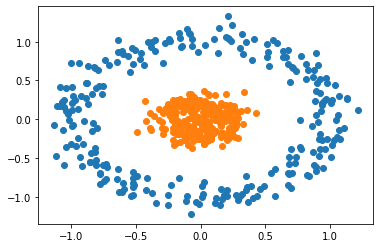

In [54]:
scatter_plot()

In [55]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        # this is the first layer of the network
        x = torch.sigmoid(self.linear(x))
        # the output of the first is fed to the second layer
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [56]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [57]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [58]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    if i % 100 == 0:
        print('Epoch: {}, Loss: {}'.format(i, loss))
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, Loss: 0.7148520350456238
Epoch: 100, Loss: 0.07139108330011368
Epoch: 200, Loss: 0.017132556065917015
Epoch: 300, Loss: 0.009565905667841434
Epoch: 400, Loss: 0.006295513361692429
Epoch: 500, Loss: 0.004502822179347277
Epoch: 600, Loss: 0.0034282272681593895
Epoch: 700, Loss: 0.0027298980858176947
Epoch: 800, Loss: 0.0022412603721022606
Epoch: 900, Loss: 0.001880280557088554


Text(0.5, 0, 'epoch')

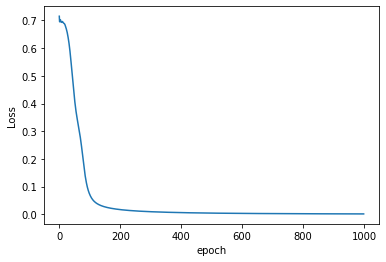

In [59]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [60]:
def plot_decision_boundary(X, y):
    # making the decision boundary by forming a grid and passing each point for its predicion
    x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0]) +0.25)
    y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1]) +0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func= (model.forward(grid))
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy ,z)

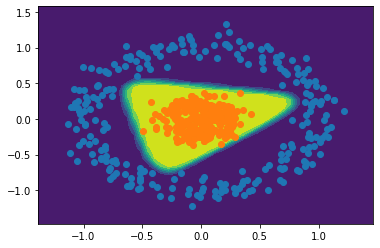

In [61]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


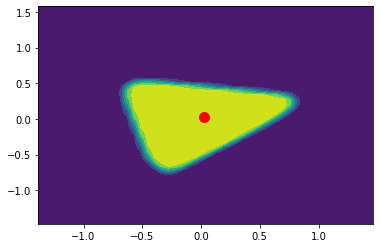

In [62]:
# making the prediction on a new point
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)